# Run Simulation

In [2]:
import sys
import os.path
from os.path import dirname
import numpy as np
from ROIAL_simulation import run_simulation
file_dir = dirname(os.getcwd())
root_directory = dirname(dirname(dirname(file_dir))) 


## online learning

In [6]:
# initialize hyperparameters
feedback_type = ['ord','pref']
model_params = {'ord_nos':0,'pref_nos':0.06,'signal_variance': 1.0, 'lengthscales': [0.15, 0.15,0.15],'GP_noise_var': 0.01,
             'IG_it':1000,'query_type':'IG','lambda': 0.0, 'saf_method': 'none',
             'pref_noise':0.015,'num_category':5, 'ordinal_noise':0.1}

#define the ordinal threshold the algorithm uses for the simulation
delta_int = 2/model_params['num_category'] 
ordinal_threshold_estimate = np.array([delta_int]*(model_params['num_category']-1))
ordinal_threshold_estimate[0] = -0.5
model_params['ord_threshold_estimate'] = ordinal_threshold_estimate

model_params['saf_method'] = 'IG_ucb' #default is none and 0, which means the ROI is the whole action space
model_params['lambda'] = 1

sub_params = {'model_params':model_params,'rd_sz':500,'run_nums': range(1),'num_trials':80,'D':3,'num_category':5,'ord_perct':False,
               'ord_b1':0.17,'ord_delta':[0.2,0.15,0.13],'file_part': file_dir + '/Simulation/Sampled_functions_3D/Sampled_objective_'}
save_folder = root_directory + '/Results/' + '_'.join(feedback_type) + '_RD_' + str(sub_params['rd_sz']) +'/'

In [7]:

run_simulation(root_directory,feedback_type,sub_params,save_folder)


ordinal threshold true:  [-0.75498344 -0.40224755  0.01273585  0.3239734   0.59371261  1.31993357]
8000
iteration:  1
4493
start rd
(501, 3)
safety set size 501
sampled action:  [ 7  0 14]
iteration:  2
2814
start rd
(502, 3)
safety set size 502
sampled action:  [17  3 14]
iteration:  3
6874
start rd
(503, 3)
safety set size 503
sampled action:  [12  7 17]
iteration:  4
4957
start rd
(504, 3)
safety set size 504
sampled action:  [ 8  9 13]
iteration:  5
3393
start rd
(505, 3)
safety set size 505
sampled action:  [ 5 12 12]
iteration:  6
2252
start rd
(506, 3)
safety set size 506
sampled action:  [19  1 11]
iteration:  7
7631
start rd
(507, 3)
safety set size 507
sampled action:  [2 1 1]
iteration:  8
821
start rd
(508, 3)
safety set size 508
sampled action:  [19  7 12]
iteration:  9
7752
start rd
(509, 3)
safety set size 509
sampled action:  [0 9 1]
iteration:  10
181
start rd
(510, 3)
safety set size 510
sampled action:  [0 6 3]
iteration:  11
123
start rd
(511, 3)
safety set size 511

## post-processing

In [12]:
from post_eval_sub_GP import eval_posterior
num_trials = 80
# you can also pass path = covariance to reuse a covariance matrix file you pregenerated
eval_posterior(save_folder,model_params,state_dim =3,num_trials = num_trials,num_runs = range(1),feedback_type = ['ord','pref'],spec_trial_only = True)
#set spec_trial_only = True means only the iteration num_trials would be post-processed

postprocessing run 0
initiate cov matrix
80


# Visualize Results
To visualize 3D function, we average the values over the third dimension

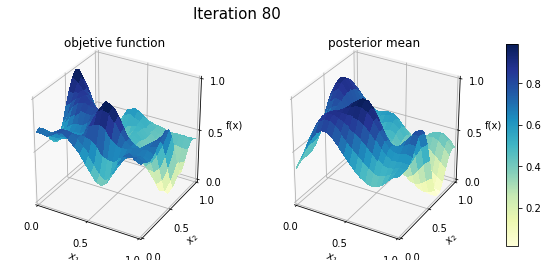

In [20]:
from plot_3d import plot_3d_function
%matplotlib inline
obj_folder = '/Users/amyli/Desktop/CalTech/gitrepo/ROIAL/Simulation/Sampled_functions_3D/'
plot_3d_function(D = 3, run_num = 0, iter_list = [num_trials], save_folder = save_folder, obj_folder = sub_params['file_part'])
#iter_list should match the specific iterations being post_processed
# for instance, if posterior was evaluated at iterations 1, 10, 20 at the previous step, you should pass iter_list = [1,10,20]